In [17]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Preprocess data
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [19]:
# Feature Scaling to be applied to both dependent and independent variables
y = y.reshape(len(y), 1) # reshape y in a 2D array
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [20]:
# Apply feature scaling now
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [21]:
# Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [22]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

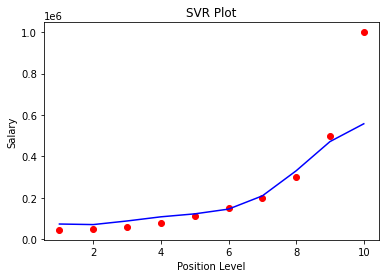

In [27]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='blue')
plt.title('SVR Plot')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

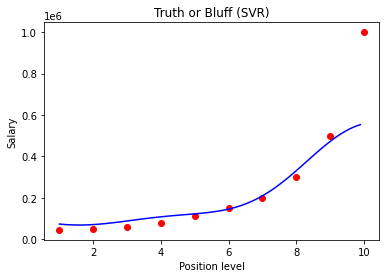

In [26]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('SVR Plot')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()